In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
blind = pd.read_csv("../psrc_lists/final_cat_snr_5_3arcmin_snr_7.csv")
blind_grouped = blind.groupby(by="cluster")["int_flux_Jy"].sum()
fluxes_blind = blind_grouped*1000
h_blind,b_blind = np.histogram(fluxes_blind,bins=np.linspace(0,25,100))
c_hist_blind = np.cumsum(h_blind[::-1])[::-1]/243

In [27]:
matched = pd.read_csv("../psrc_lists/final_matched_snr_5_3arcmin_snr_7.csv")
matched_grouped = matched.groupby(by="cluster")["int_flux_Jy"].sum()
fluxes_matched = matched_grouped*1000
h_match,b_match = np.histogram(fluxes_matched,bins=np.linspace(0,25,26))
c_hist_match = np.cumsum(h_match[::-1])[::-1]/243

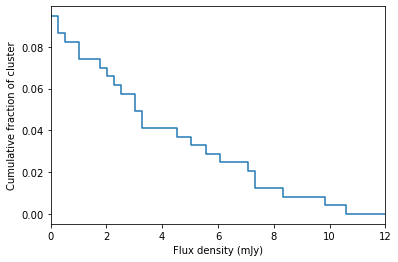

In [34]:
plt.step(b_blind[:-1],c_hist_blind,where="post")
plt.xlim(0,12)
plt.xlabel("Flux density (mJy)")
plt.ylabel("Cumulative fraction of cluster")
plt.savefig("cumulative_fraction_clusters.jpeg")

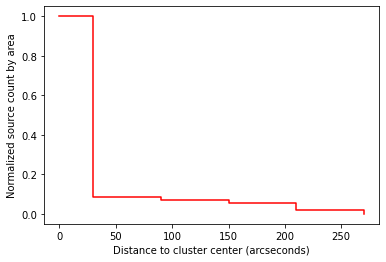

In [37]:
histo, bins = np.histogram(blind["dist_center_radians"]*180/np.pi*3600,bins=[0,30,90,150,210,270,300])
norm_area = np.pi*30**2/histo[0]
n_arr = []
i=1
for i in range(len(bins)):
    area = np.pi*bins[i]**2 - np.pi*(bins[i-1])**2
    norm_c = norm_area/area
    n_arr = np.append(n_arr,norm_c)
plt.step(bins[:-1],histo*n_arr[1:],where="post",c="r")
plt.xlabel("Distance to cluster center (arcseconds)")
plt.ylabel("Normalized source count by area")
plt.savefig("dist_cluster_center_norm_source_count_hist.jpeg")

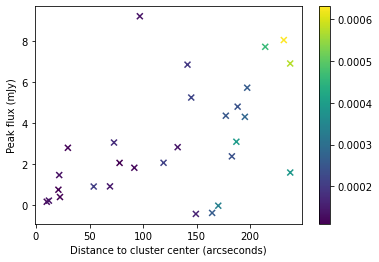

In [36]:
plt.scatter(blind["dist_center_radians"]*180/np.pi*3600, blind["amp_fit"]*1000,marker="x",c=blind["noise_ps"])
plt.colorbar()
plt.xlabel("Distance to cluster center (arcseconds)")
plt.ylabel("Peak flux (mJy)")
plt.savefig("dist_center_vs_peak_flux.jpeg")